# MudraLoan Data Analysis

# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Anwar1094/ModraLoan/refs/heads/main/mudraloandataset.csv')
df

,ID,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Target
0,0,Existing,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,1,Axis Bank Ltd.,No,0
1,1,New,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,Rs.38283367.68,6,451120,Rs.43647360.0,Rs.43647360.0,123,1,Bandhan Bank Ltd.,0,1
2,2,Existing,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,1,CSB Bank Limited,Yes,0
3,3,New,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,0,City Union Bank Ltd.,Yes,0
4,4,Existing,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,Rs.22862519.68,4,722211,Rs.30642560.0,Rs.30642560.0,104,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,Existing,2005,Rs.1422400.0,JOSEPH JOHNSON JR DBA JOSEPH J,No,Urban,Rs.0.0,5,562111,Rs.2844800.0,Rs.2844800.0,36,1,HDFC Bank Ltd,Yes,0
9995,9995,Existing,1986,Rs.4291584.0,MU JIN JANG RESTAURANT,No,Undefined,Rs.2894624.64,2,0,Rs.4876800.0,Rs.4876800.0,46,0,Sumitomo Mitsui Banking Corporation,No,1
9996,9996,Existing,2007,Rs.447040.0,"Owens & Chaney Trucking, Inc.",No,Urban,Rs.894080.0,3,488999,Rs.894080.0,Rs.1494739.2,88,0,ICICI Bank Ltd.,No,1
9997,9997,New,2000,Rs.2357120.0,ARCTIC PRINTING,No,Rural,Rs.3253313.2800000003,1,0,Rs.4714240.0,Rs.4714240.0,6,1,Dhanlaxmi Bank Ltd.,0,1


# Problem Statement:
## Whether the loan get approved or not based on preferred parameters.

In [3]:
df.shape # 9999 rows and 17 columns in the DataFrame

(9999, 17)

In [4]:
df.info() # understanding dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         9999 non-null   int64 
 1   Business                   9999 non-null   object
 2   Year_Of_Commitment         9999 non-null   int64 
 3   Guaranteed_Approved _Loan  9999 non-null   object
 4   Borrower_Name              9998 non-null   object
 5   Low_Documentation_Loan     9958 non-null   object
 6   Demography                 9999 non-null   object
 7   ChargedOff_Amount          9999 non-null   object
 8   Count_Employees            9999 non-null   int64 
 9   Classification_Code        9999 non-null   int64 
 10  Loan_Approved_Gross        9999 non-null   object
 11  Gross_Amount_Disbursed     9999 non-null   object
 12  Loan_Term                  9999 non-null   int64 
 13  Code_Franchise             9999 non-null   int64 
 14  Name_Of_

In [5]:
df.columns

Index(['ID', 'Business', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'ChargedOff_Amount ', 'Count_Employees', 'Classification_Code ',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term',
       'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line', 'Target'],
      dtype='object')

In [6]:
df.rename(columns={'Year_Of_Commitment ':'Year_Of_Commitment', 
                  'Borrower_Name ':'Borrower_Name',
                  'ChargedOff_Amount ':'ChargedOff_Amount',
                  'Classification_Code ':'Classification_Code',
                  'Gross_Amount_Disbursed  ':'Gross_Amount_Disbursed'}, inplace=True)
df.columns

Index(['ID', 'Business', 'Year_Of_Commitment', 'Guaranteed_Approved _Loan',
       'Borrower_Name', 'Low_Documentation_Loan', 'Demography',
       'ChargedOff_Amount', 'Count_Employees', 'Classification_Code',
       'Loan_Approved_Gross', 'Gross_Amount_Disbursed', 'Loan_Term',
       'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line', 'Target'],
      dtype='object')

In [7]:
# Since some columns are numerical but due to 'Rs.' prefix they are represented as categorical so convert them into numerical.

In [8]:
def covert(cur):
    return cur.replace('Rs.', '').replace(',', '').strip()
for col in ['Guaranteed_Approved _Loan', 'ChargedOff_Amount', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed']:
    df[col] = df[col].apply(covert)
df

,ID,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Target
0,0,Existing,1991,33121600.0,STANDARD PARTS CORPORATION,No,Undefined,0.0,38,0,40640000.0,40640000.0,126,1,Axis Bank Ltd.,No,0
1,1,New,2006,32735520.0,FRANK & KERI AMESTOY,No,Urban,38283367.68,6,451120,43647360.0,43647360.0,123,1,Bandhan Bank Ltd.,0,1
2,2,Existing,2004,1422400.0,TELECOMMQC L L C,No,Urban,0.0,4,541618,2844800.0,5961400.32,90,1,CSB Bank Limited,Yes,0
3,3,New,2006,2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,0.0,7,811112,4064000.0,4064000.0,126,0,City Union Bank Ltd.,Yes,0
4,4,Existing,2005,22981920.0,SUNBEAM DELI,No,Urban,22862519.68,4,722211,30642560.0,30642560.0,104,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,Existing,2005,1422400.0,JOSEPH JOHNSON JR DBA JOSEPH J,No,Urban,0.0,5,562111,2844800.0,2844800.0,36,1,HDFC Bank Ltd,Yes,0
9995,9995,Existing,1986,4291584.0,MU JIN JANG RESTAURANT,No,Undefined,2894624.64,2,0,4876800.0,4876800.0,46,0,Sumitomo Mitsui Banking Corporation,No,1
9996,9996,Existing,2007,447040.0,"Owens & Chaney Trucking, Inc.",No,Urban,894080.0,3,488999,894080.0,1494739.2,88,0,ICICI Bank Ltd.,No,1
9997,9997,New,2000,2357120.0,ARCTIC PRINTING,No,Rural,3253313.2800000003,1,0,4714240.0,4714240.0,6,1,Dhanlaxmi Bank Ltd.,0,1


In [9]:
# Convert categorical data to numeric data
for col in ['Guaranteed_Approved _Loan', 'ChargedOff_Amount', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed']:
    df[col] = pd.to_numeric(df[col])
df

,ID,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Target
0,0,Existing,1991,33121600.0,STANDARD PARTS CORPORATION,No,Undefined,0.00,38,0,40640000.0,40640000.00,126,1,Axis Bank Ltd.,No,0
1,1,New,2006,32735520.0,FRANK & KERI AMESTOY,No,Urban,38283367.68,6,451120,43647360.0,43647360.00,123,1,Bandhan Bank Ltd.,0,1
2,2,Existing,2004,1422400.0,TELECOMMQC L L C,No,Urban,0.00,4,541618,2844800.0,5961400.32,90,1,CSB Bank Limited,Yes,0
3,3,New,2006,2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,0.00,7,811112,4064000.0,4064000.00,126,0,City Union Bank Ltd.,Yes,0
4,4,Existing,2005,22981920.0,SUNBEAM DELI,No,Urban,22862519.68,4,722211,30642560.0,30642560.00,104,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,Existing,2005,1422400.0,JOSEPH JOHNSON JR DBA JOSEPH J,No,Urban,0.00,5,562111,2844800.0,2844800.00,36,1,HDFC Bank Ltd,Yes,0
9995,9995,Existing,1986,4291584.0,MU JIN JANG RESTAURANT,No,Undefined,2894624.64,2,0,4876800.0,4876800.00,46,0,Sumitomo Mitsui Banking Corporation,No,1
9996,9996,Existing,2007,447040.0,"Owens & Chaney Trucking, Inc.",No,Urban,894080.00,3,488999,894080.0,1494739.20,88,0,ICICI Bank Ltd.,No,1
9997,9997,New,2000,2357120.0,ARCTIC PRINTING,No,Rural,3253313.28,1,0,4714240.0,4714240.00,6,1,Dhanlaxmi Bank Ltd.,0,1


In [10]:
df.info() #Statistical analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         9999 non-null   int64  
 1   Business                   9999 non-null   object 
 2   Year_Of_Commitment         9999 non-null   int64  
 3   Guaranteed_Approved _Loan  9999 non-null   float64
 4   Borrower_Name              9998 non-null   object 
 5   Low_Documentation_Loan     9958 non-null   object 
 6   Demography                 9999 non-null   object 
 7   ChargedOff_Amount          9999 non-null   float64
 8   Count_Employees            9999 non-null   int64  
 9   Classification_Code        9999 non-null   int64  
 10  Loan_Approved_Gross        9999 non-null   float64
 11  Gross_Amount_Disbursed     9999 non-null   float64
 12  Loan_Term                  9999 non-null   int64  
 13  Code_Franchise             9999 non-null   int64

### Finding Nulls

In [11]:
df.isnull().sum() # sum of all nulls present in specific column

ID                            0
Business                      0
Year_Of_Commitment            0
Guaranteed_Approved _Loan     0
Borrower_Name                 1
Low_Documentation_Loan       41
Demography                    0
ChargedOff_Amount             0
Count_Employees               0
Classification_Code           0
Loan_Approved_Gross           0
Gross_Amount_Disbursed        0
Loan_Term                     0
Code_Franchise                0
Name_Of_Bank                  0
Revolving_Credit_Line        48
Target                        0
dtype: int64

### Numerical data analysis

In [12]:
df.describe() # Descriptive analysis

,ID,Year_Of_Commitment,Guaranteed_Approved _Loan,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Target
count,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000
mean,4999.000000,2001.485349,1.150412e+07,1.725210e+06,9.449245,407923.249225,1.488547e+07,1.556471e+07,155.956396,2770.468347,0.285129
std,2886.607005,5.959989,1.847319e+07,6.249312e+06,48.527419,259967.838677,2.266682e+07,2.256681e+07,115.609902,12892.428333,0.451498
min,0.000000,1970.000000,8.128000e+04,0.000000e+00,0.000000,0.000000,1.625600e+05,3.251200e+05,0.000000,0.000000,0.000000
25%,2499.500000,1997.000000,1.422400e+06,0.000000e+00,2.000000,236115.000000,2.438400e+06,3.251200e+06,88.000000,0.000000,0.000000
50%,4999.000000,2003.000000,4.226560e+06,0.000000e+00,4.000000,447110.000000,6.583680e+06,7.948940e+06,126.000000,1.000000,0.000000
75%,7498.500000,2006.000000,1.310640e+07,7.234326e+05,9.000000,561890.000000,1.697939e+07,1.810642e+07,180.000000,1.000000,1.000000
max,9998.000000,2014.000000,2.773233e+08,1.297309e+08,3150.000000,928120.000000,3.129280e+08,3.125216e+08,513.000000,91280.000000,1.000000


### Categorical data analysis

In [13]:
df.describe(include='object') # Descriptive analysis of categorical data

,Business,Borrower_Name,Low_Documentation_Loan,Demography,Name_Of_Bank,Revolving_Credit_Line
count,9999,9998,9958,9999,9999,9951
unique,3,9908,6,3,143,4
top,Existing,SUBWAY,No,Urban,ICICI Bank Ltd.,No
freq,7141,12,8760,5506,1082,4542


### Treating nulls

In [14]:
# Filling nulls values with mode
df['Low_Documentation_Loan'].fillna('No', inplace=True)
df['Revolving_Credit_Line'].fillna('No', inplace=True)

In [15]:
df.dropna(inplace=True) # dropping a single row containg null value in Borrower_Name column

In [16]:
df.isnull().sum() # again check for nulls

ID                           0
Business                     0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Borrower_Name                0
Low_Documentation_Loan       0
Demography                   0
ChargedOff_Amount            0
Count_Employees              0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Code_Franchise               0
Name_Of_Bank                 0
Revolving_Credit_Line        0
Target                       0
dtype: int64

### Drop Unnecessary Columns

In [17]:
df[df.duplicated() == True] # There is no duplicates in the dataset

,ID,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Target


In [18]:
for col in ['ID', 'Borrower_Name', 'Name_Of_Bank']:
    df.drop(columns=col, axis=1, inplace=True)
df

,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Revolving_Credit_Line,Target
0,Existing,1991,33121600.0,No,Undefined,0.00,38,0,40640000.0,40640000.00,126,1,No,0
1,New,2006,32735520.0,No,Urban,38283367.68,6,451120,43647360.0,43647360.00,123,1,0,1
2,Existing,2004,1422400.0,No,Urban,0.00,4,541618,2844800.0,5961400.32,90,1,Yes,0
3,New,2006,2032000.0,No,Urban,0.00,7,811112,4064000.0,4064000.00,126,0,Yes,0
4,Existing,2005,22981920.0,No,Urban,22862519.68,4,722211,30642560.0,30642560.00,104,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Existing,2005,1422400.0,No,Urban,0.00,5,562111,2844800.0,2844800.00,36,1,Yes,0
9995,Existing,1986,4291584.0,No,Undefined,2894624.64,2,0,4876800.0,4876800.00,46,0,No,1
9996,Existing,2007,447040.0,No,Urban,894080.00,3,488999,894080.0,1494739.20,88,0,No,1
9997,New,2000,2357120.0,No,Rural,3253313.28,1,0,4714240.0,4714240.00,6,1,0,1


## Data correction

In [19]:
df['Revolving_Credit_Line'].value_counts()

Revolving_Credit_Line
No     4590
0      2846
Yes    2366
T       196
Name: count, dtype: int64

In [20]:
df['Revolving_Credit_Line'].replace('0', 'No', inplace=True)

In [21]:
df['Low_Documentation_Loan'].value_counts()

Low_Documentation_Loan
No     8800
Yes    1153
0        17
S        12
A         8
C         8
Name: count, dtype: int64

In [22]:
df['Low_Documentation_Loan'].replace('0', 'No', inplace=True)

In [23]:
df['Demography'].value_counts()

Demography
Urban        5506
Undefined    3353
Rural        1139
Name: count, dtype: int64

In [24]:
df['Business'].value_counts()

Business
Existing    7140
New         2851
0              7
Name: count, dtype: int64

In [25]:
df['Business'].replace('0', 'Existing', inplace=True)

### Data Cleaning Done here!

# Exploratory Data Analysis
## Visualization

## UNIVARIATE ANALYSIS (Numerical columns)

In [26]:
num_cols = df.select_dtypes(include='number')
obj_cols = df.select_dtypes(exclude='number')

## Plotting Box plot for all numerical columns

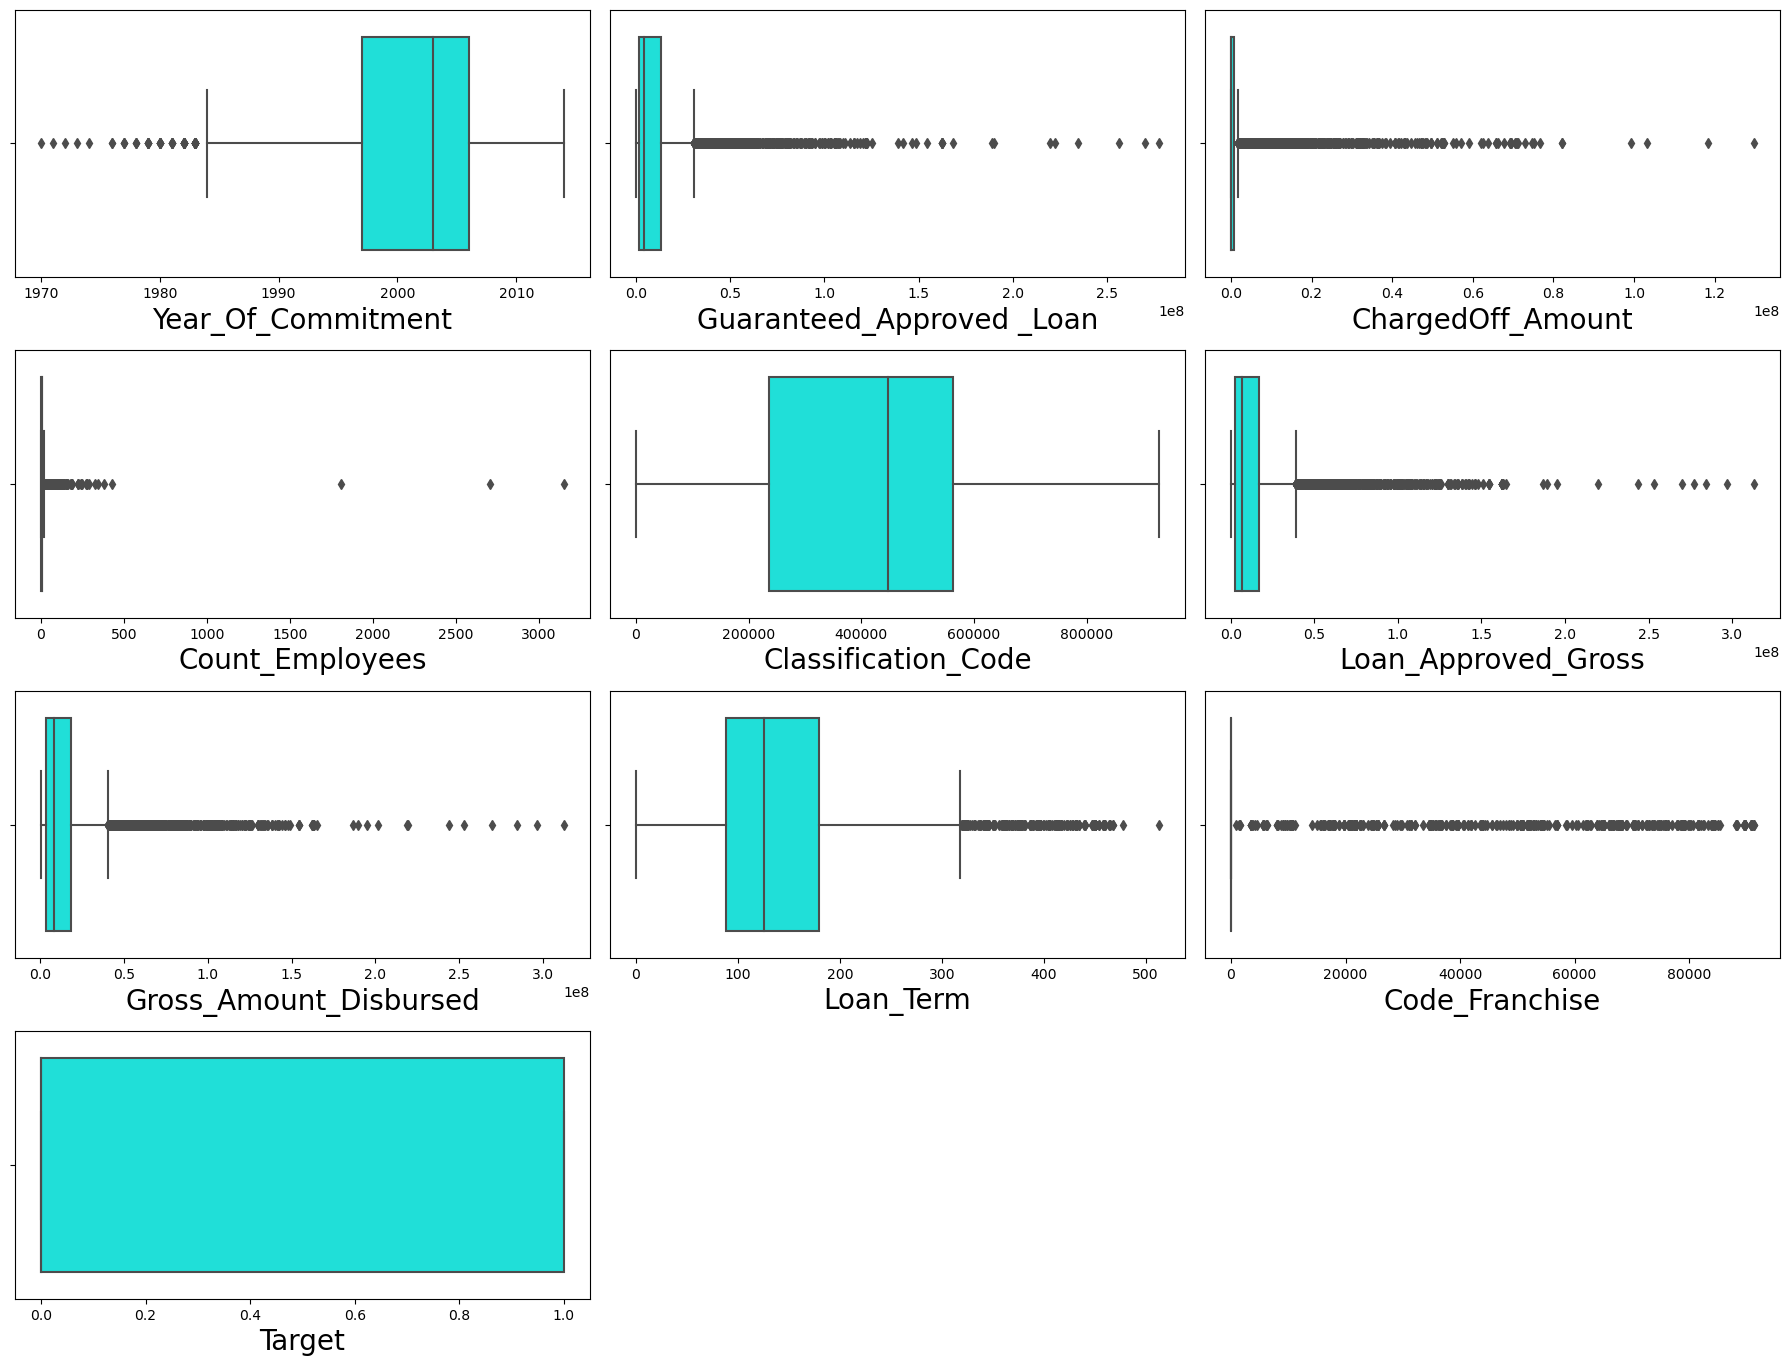

In [27]:
plt.figure(figsize=(18, 20), facecolor='white')
plotnumber = 1
for column in num_cols.columns:
    if plotnumber <= 18:  
        ax = plt.subplot(6, 3, plotnumber) 
        sns.boxplot(x=df[column], palette='hsv')  
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Treating Outliers using IQR method

In [28]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                         np.where(df[col] > upper_bound, upper_bound, df[col]))
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                         np.where(df[col] > upper_bound, upper_bound, df[col]))
#     here are outliers in columns: Count_Employees, Loan_Term, Code_Franchise Guarantee_Approved_Loan, ChargedOff_Amount, Loan_Approved_Gross, Gross_Amount_Disbursed

## Boxplot of all Numerical Columns after ignoring outliers

Maximum number of subplots reached.


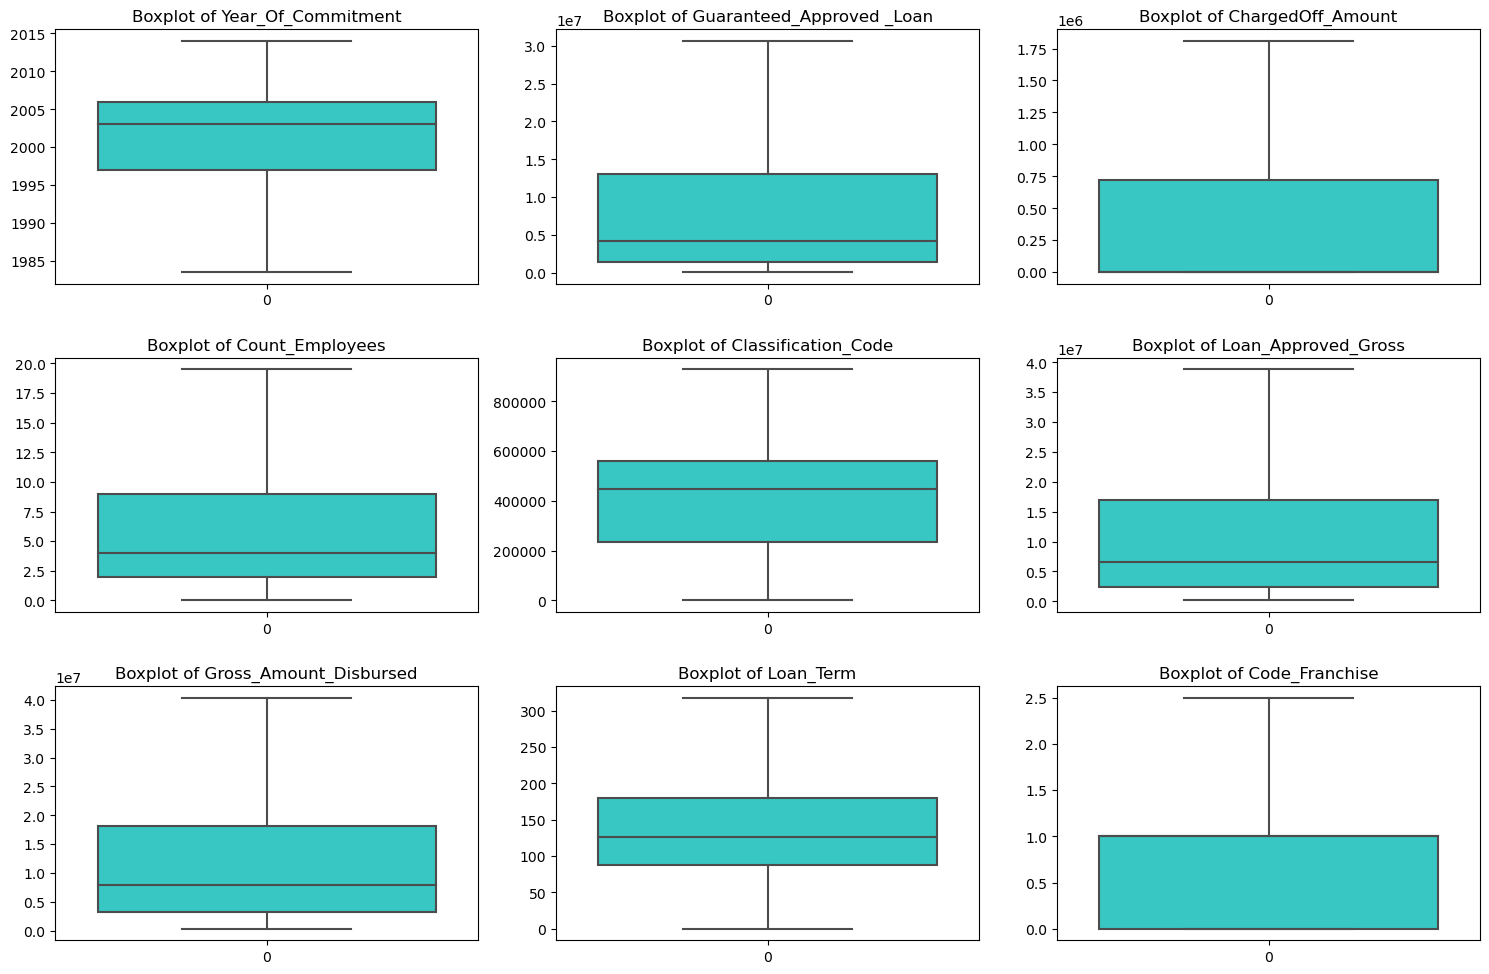

In [29]:
plt.figure(figsize=(15, 10))
counter = 1
for col in num_cols:
    if counter > 9:
        print("Maximum number of subplots reached.")
        break
    plt.subplot(3, 3, counter)  
    sns.boxplot(df[col], color='#20dfd8')
    plt.title(f'Boxplot of {col}')
    counter += 1  
plt.tight_layout()
plt.show()

## Pie Plot

<Axes: ylabel='count'>

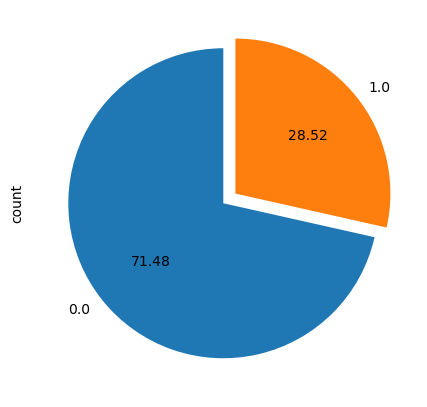

In [30]:
plt.figure(figsize=(5,8))
df['Target'].value_counts().plot(kind='pie',autopct='%.2f', explode=(0,0.1), startangle=90)

## Bar Plot

In [31]:
df['Demography'].value_counts()

Demography
Urban        5506
Undefined    3353
Rural        1139
Name: count, dtype: int64

<Axes: xlabel='Demography'>

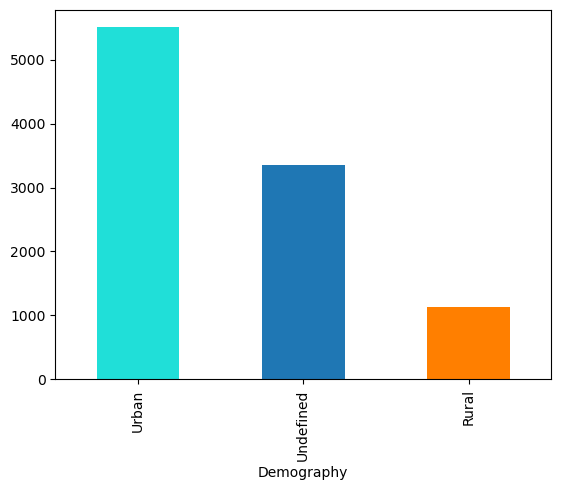

In [32]:
df['Demography'].value_counts().plot(kind='bar',color=['#20dfd8','#1f77b4', '#ff7f00'])

<Axes: xlabel='Target'>

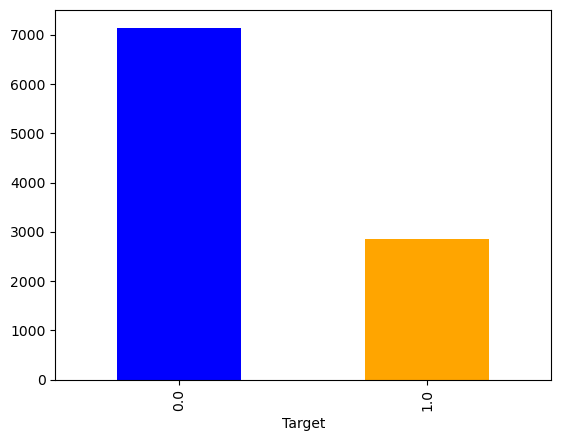

In [33]:
df['Target'].value_counts().plot(kind='bar',color=['blue','orange'])

## BIVARIATE ANALYSIS (Numerical columns)

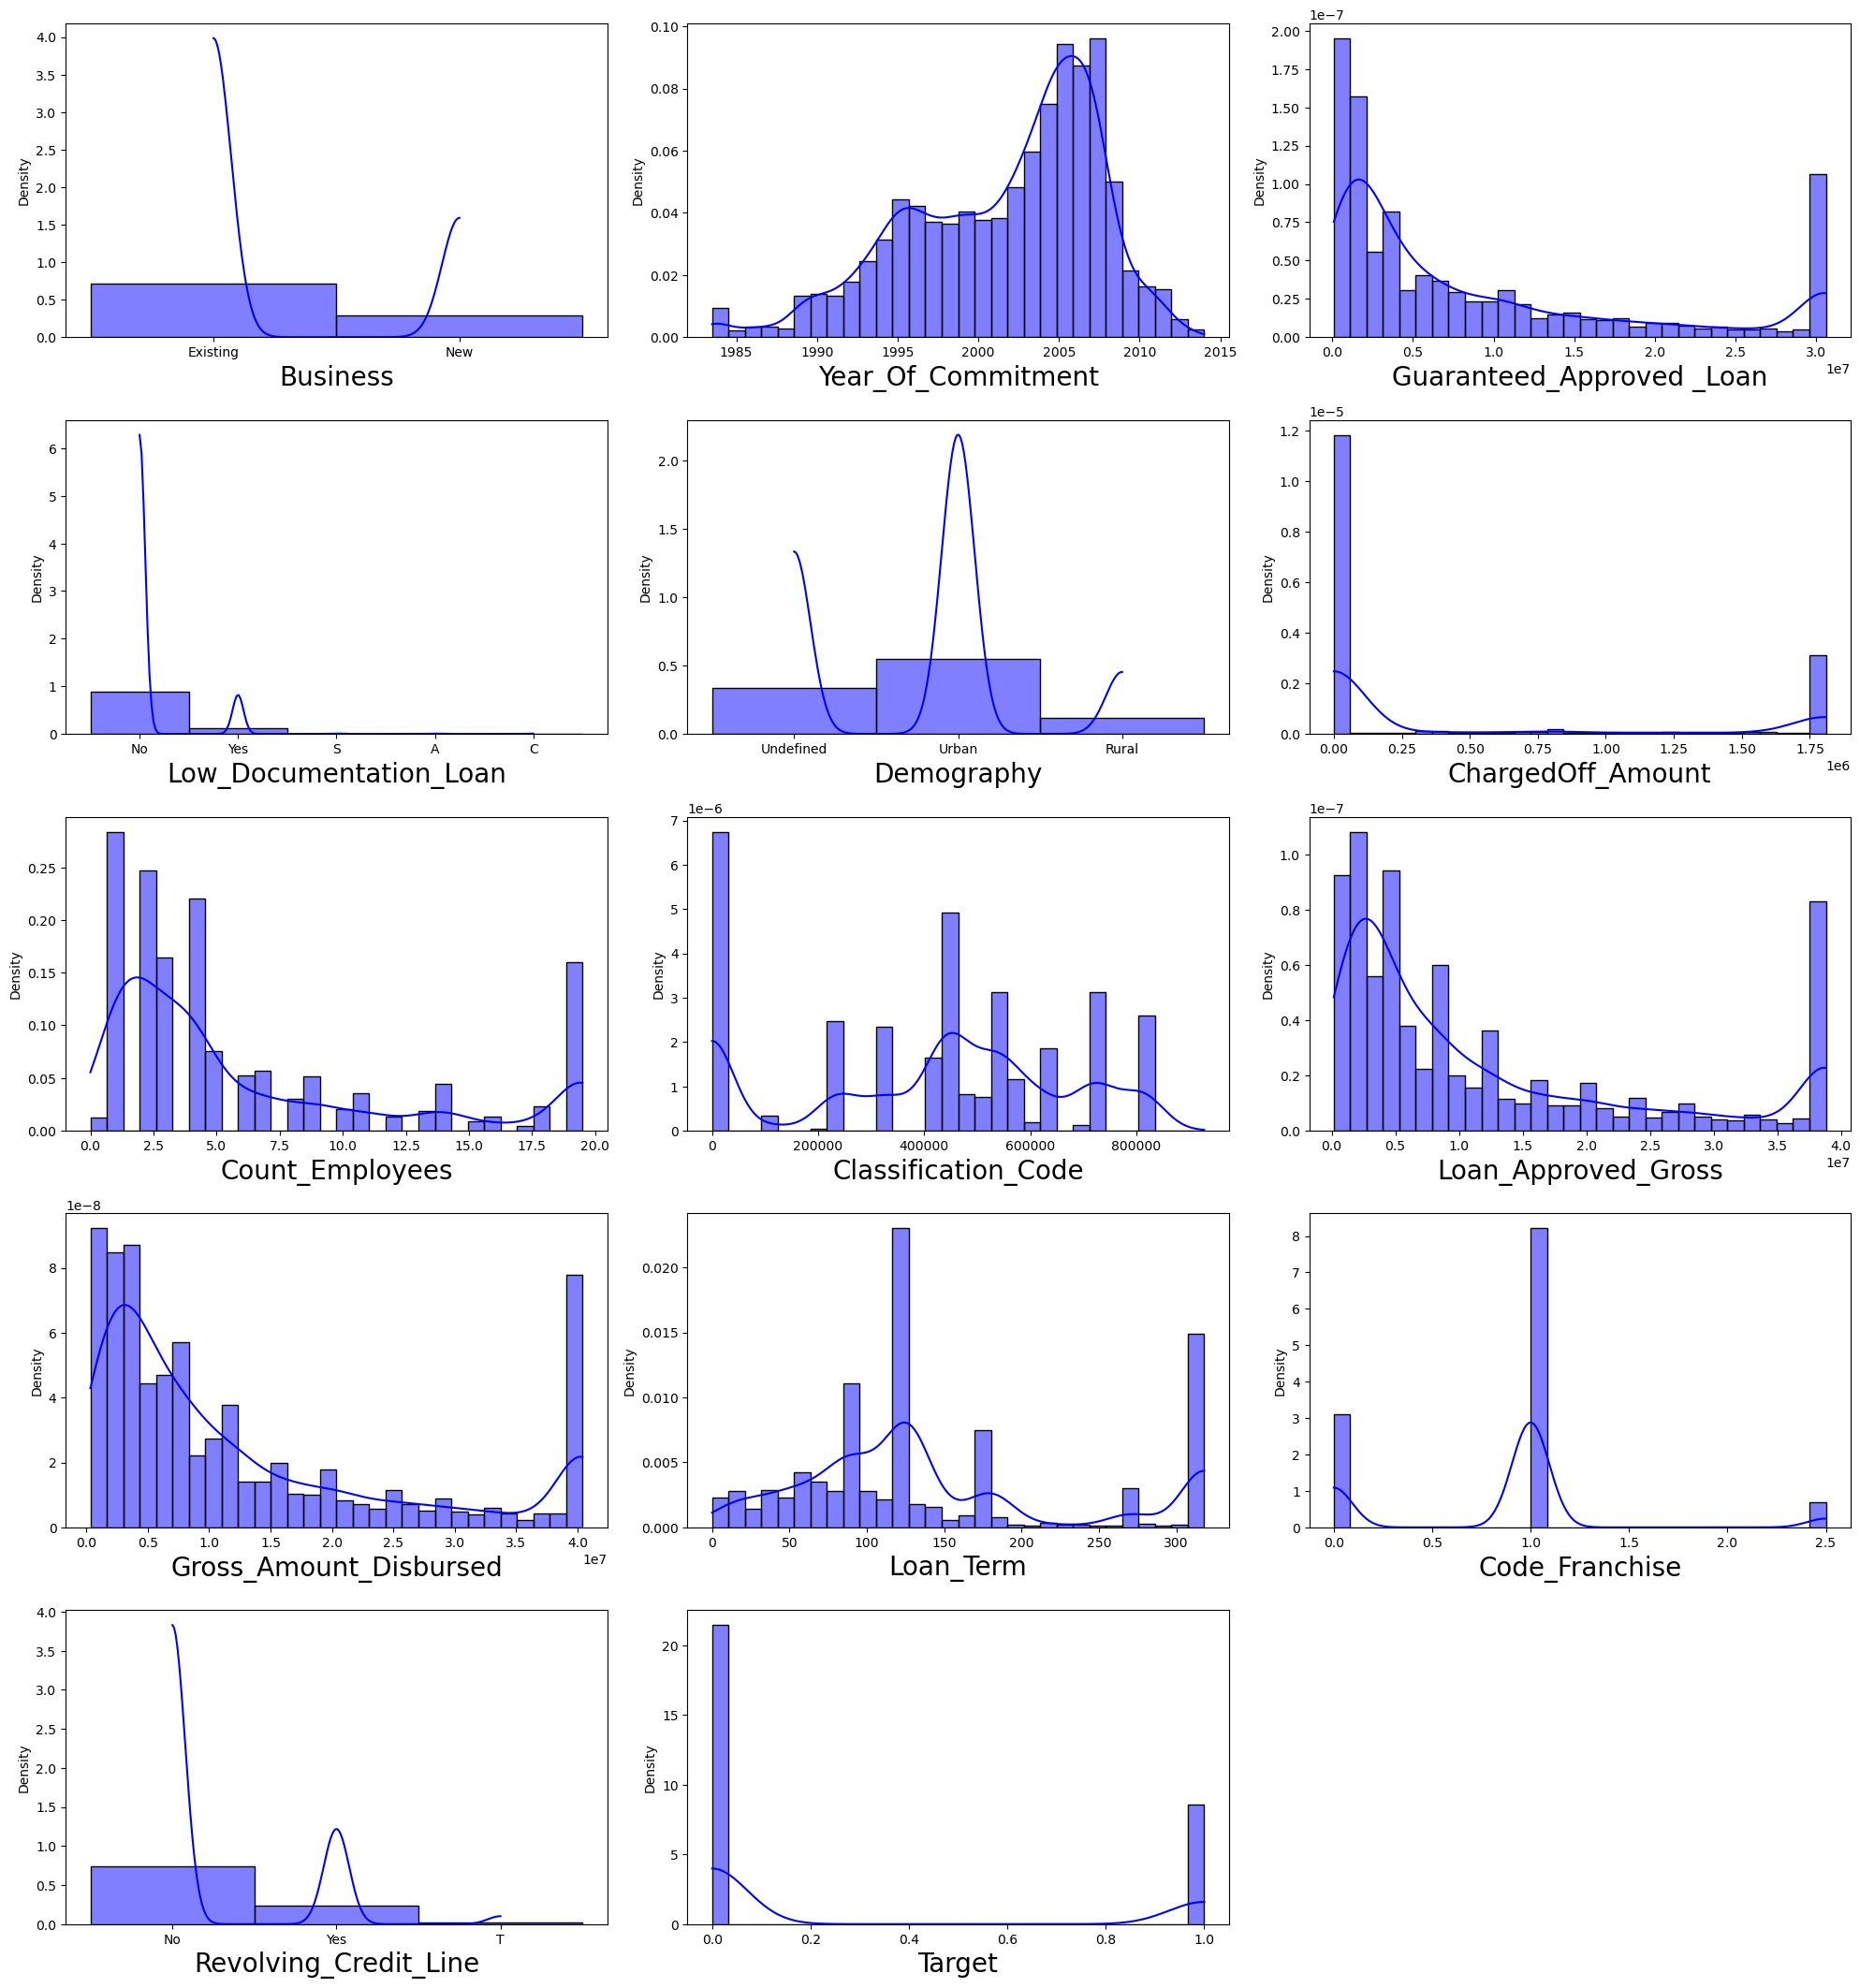

In [34]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1
for column in df.columns:
    if plotnumber <= 17: 
        ax = plt.subplot(6, 3, plotnumber)
        sns.histplot(df[column], color='b', kde=True, stat="density", bins=30)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Scatter Plot

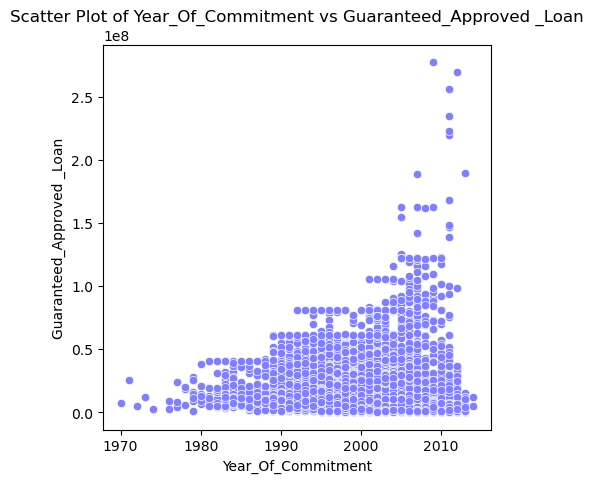

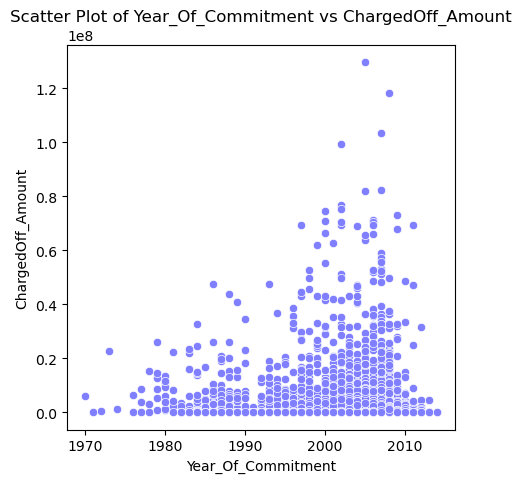

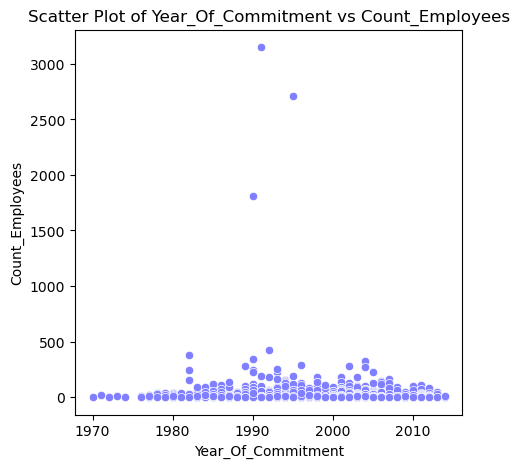

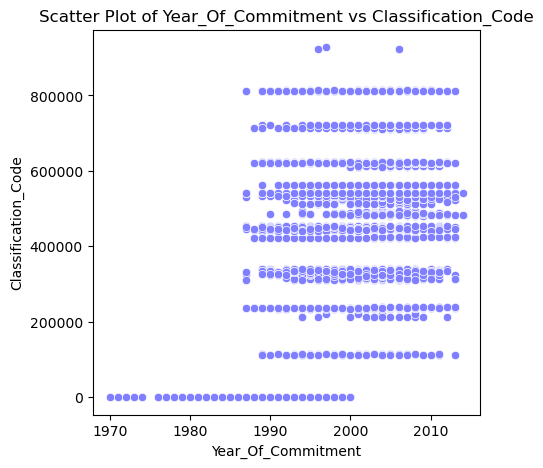

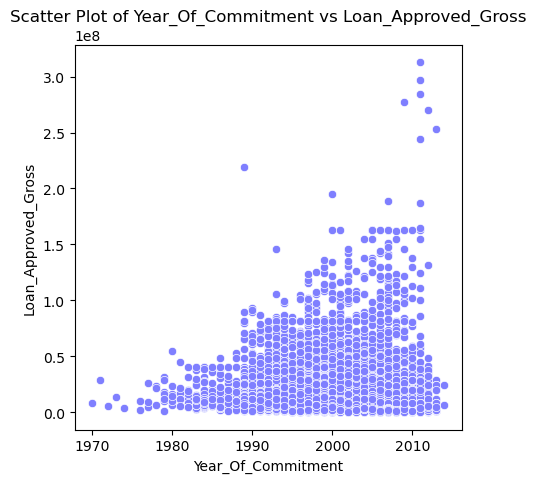

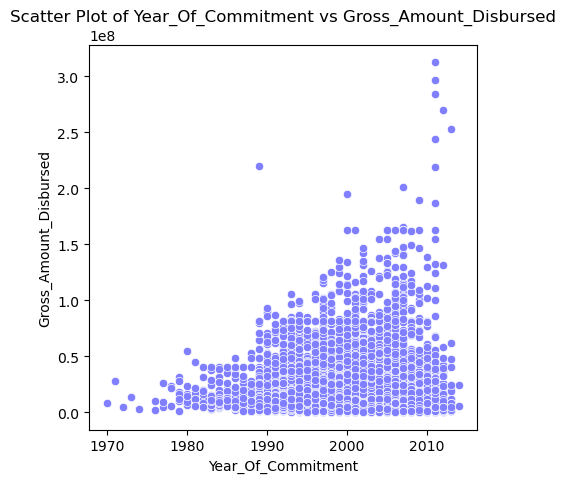

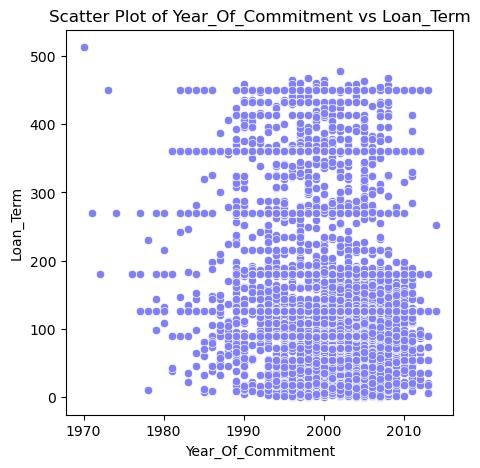

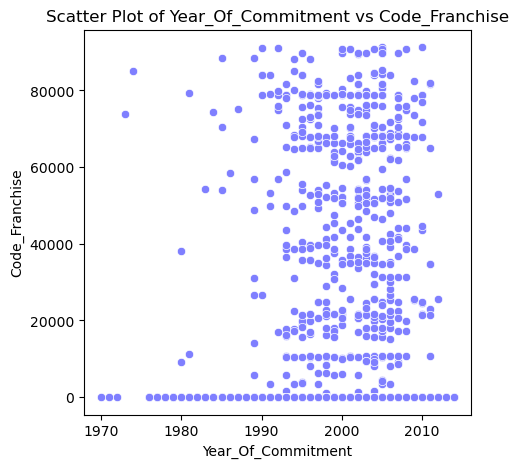

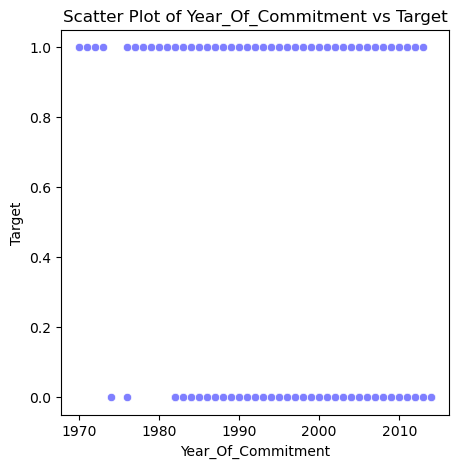

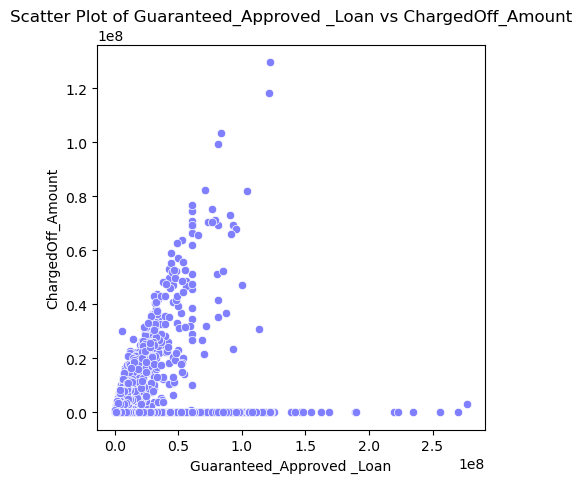

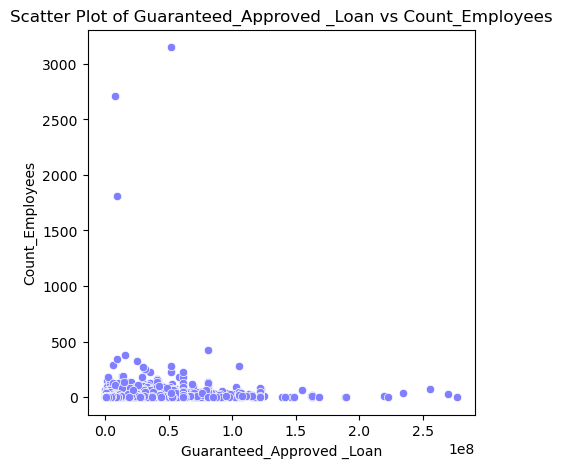

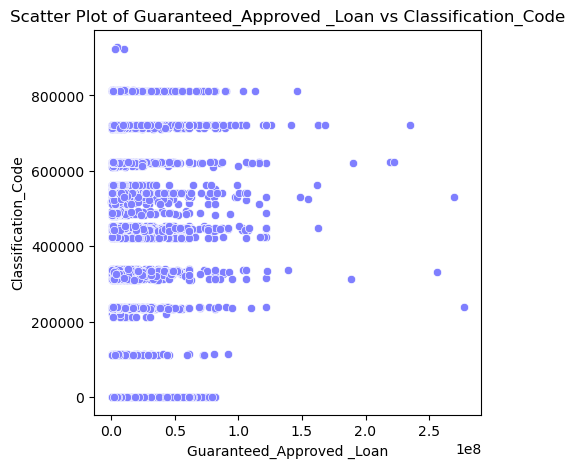

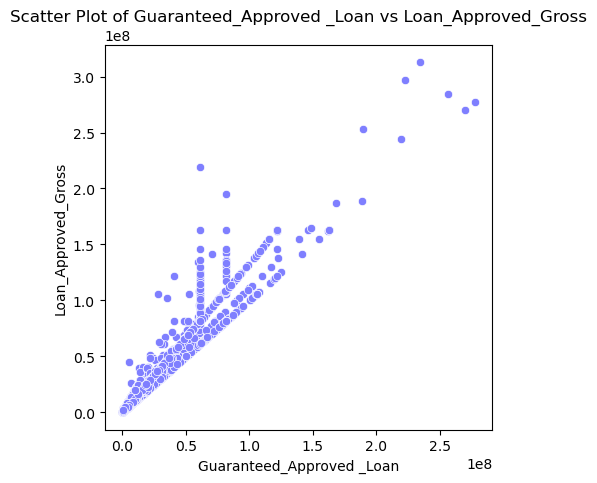

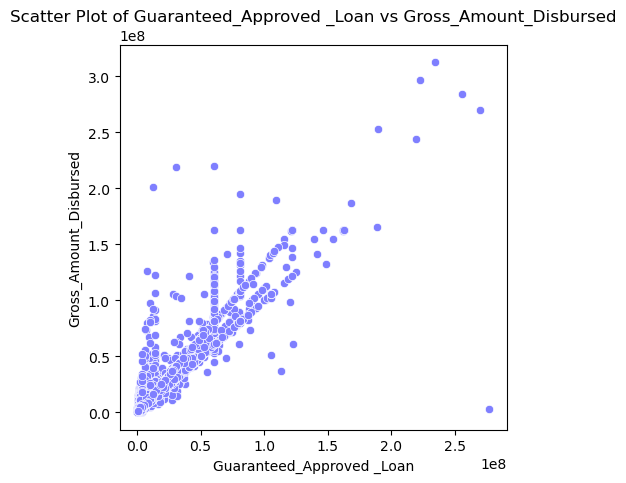

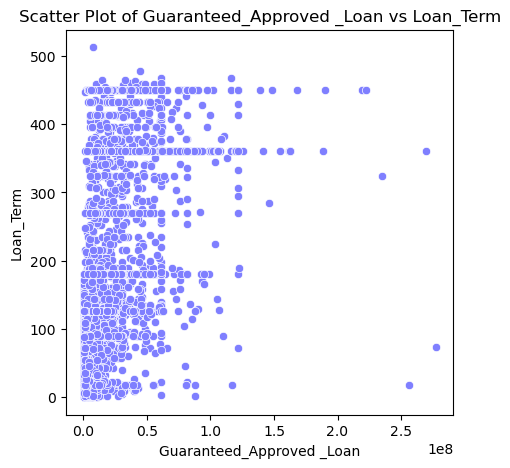

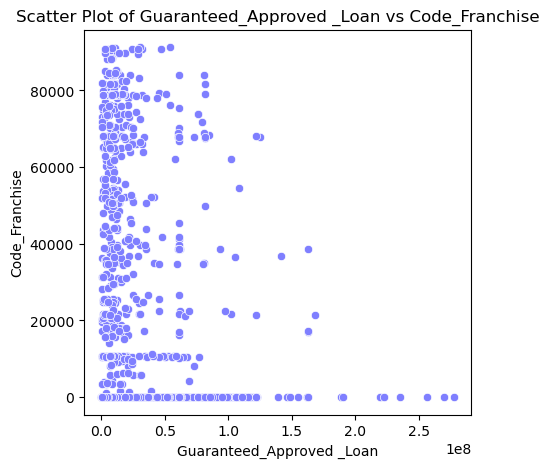

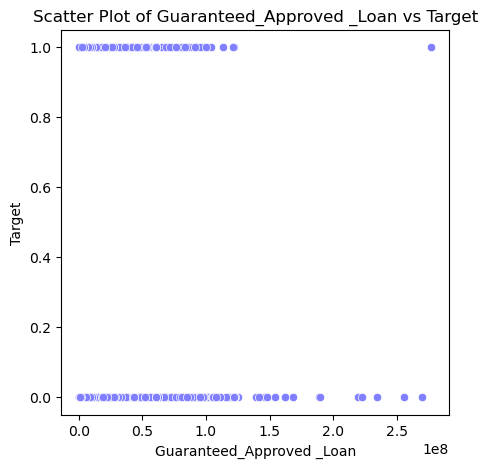

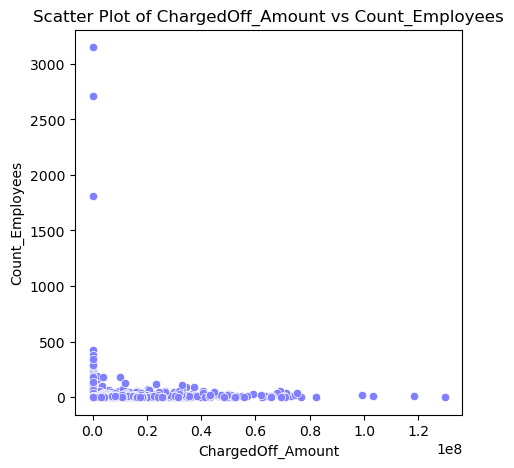

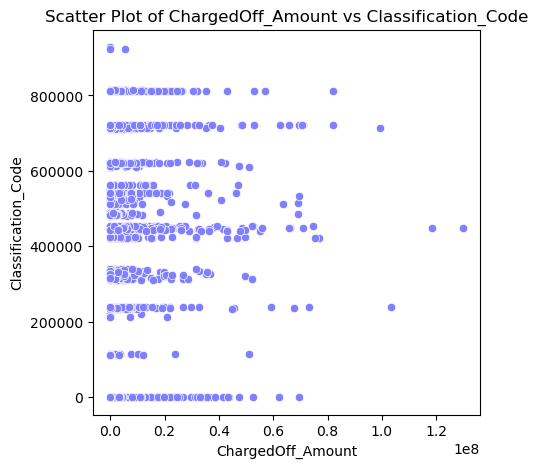

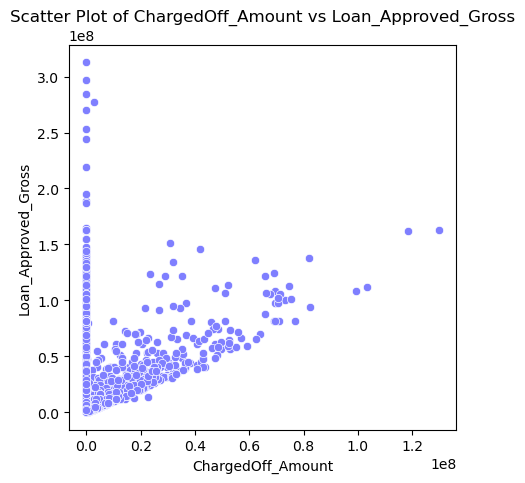

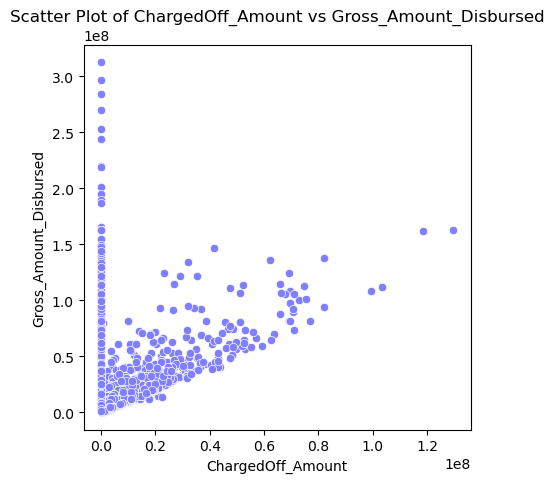

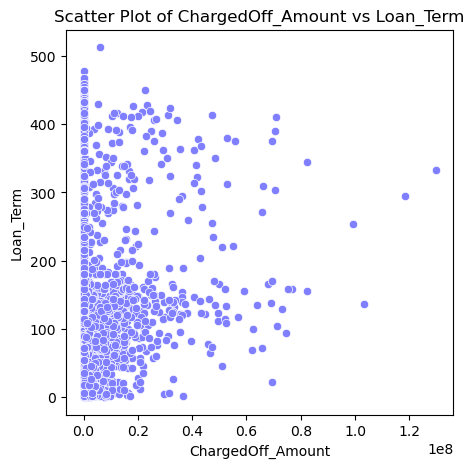

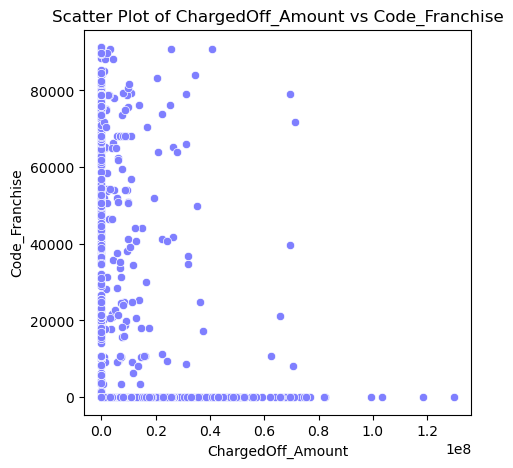

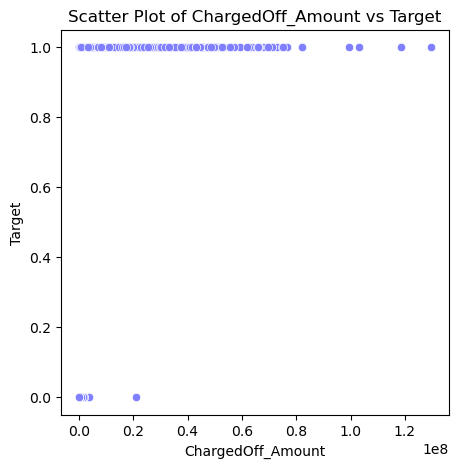

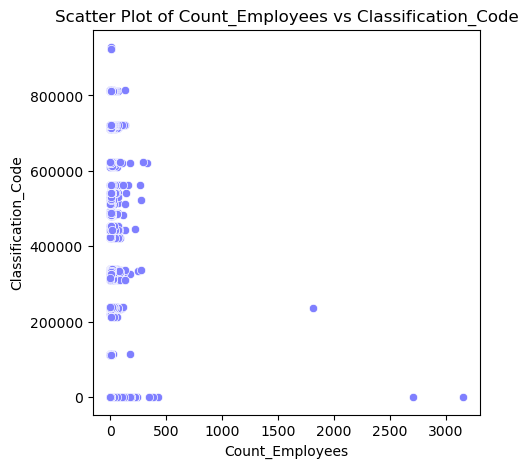

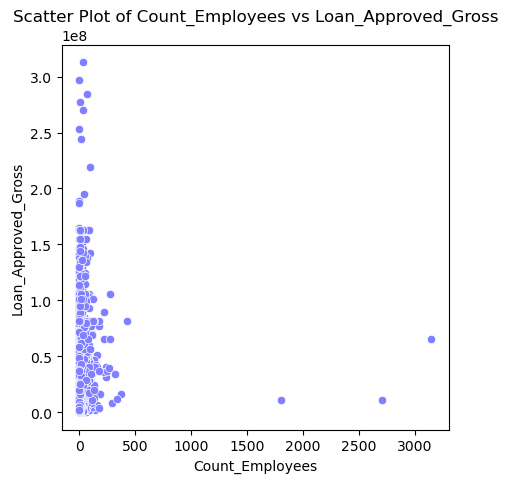

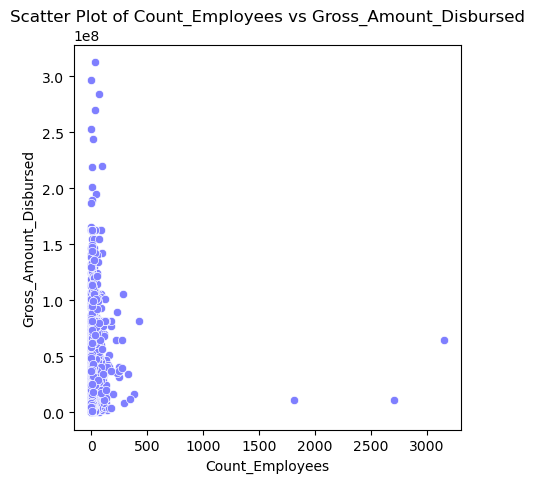

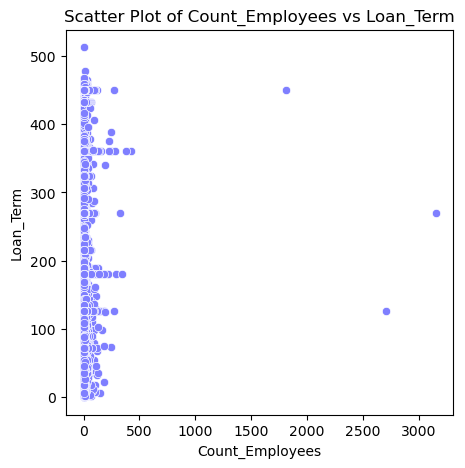

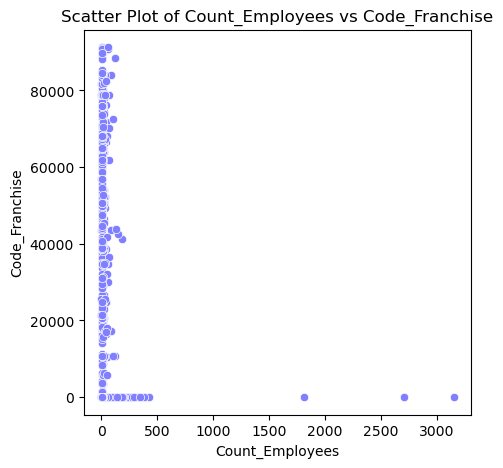

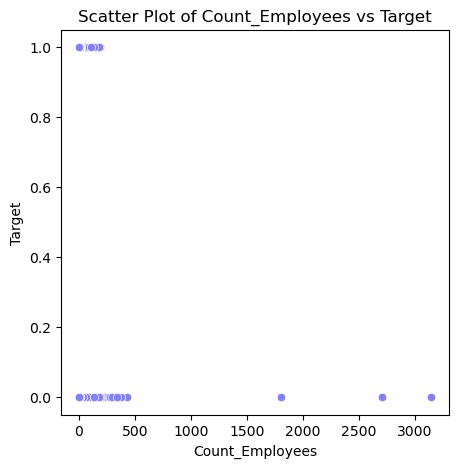

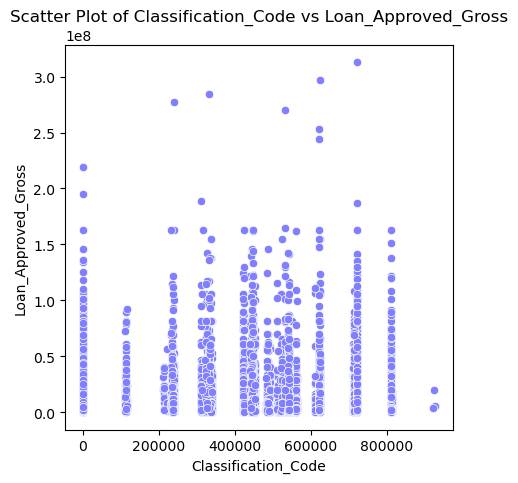

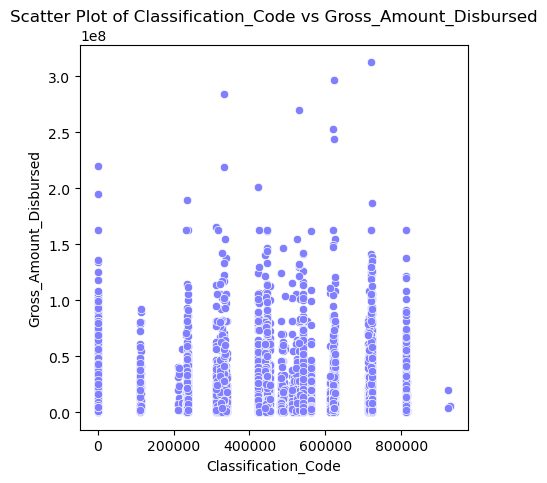

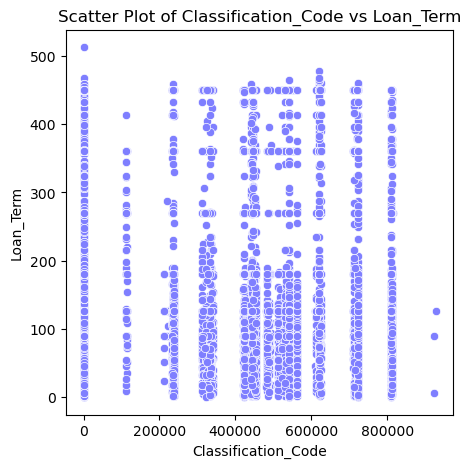

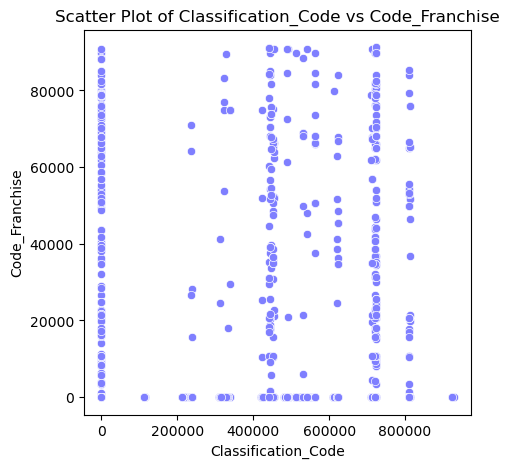

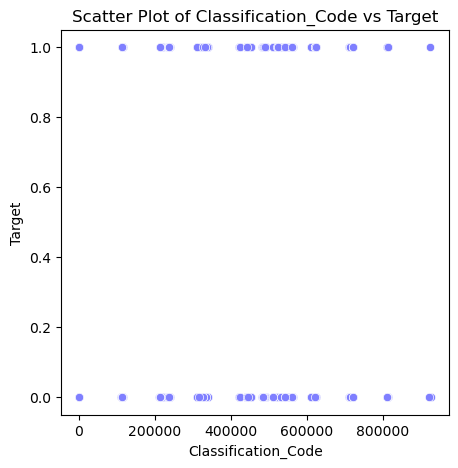

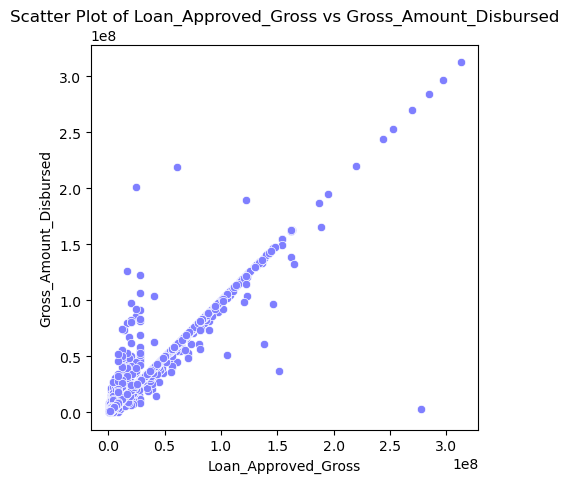

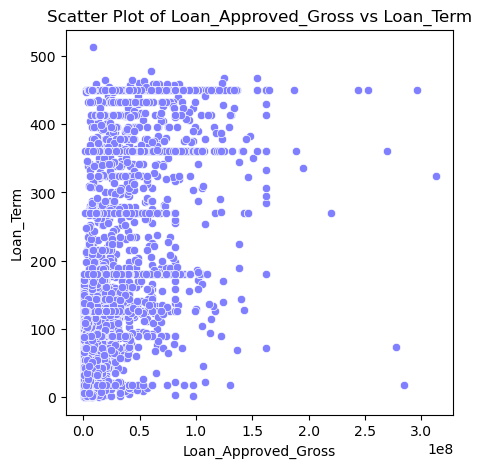

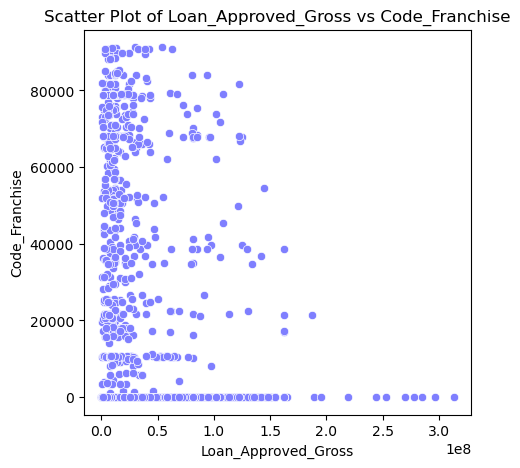

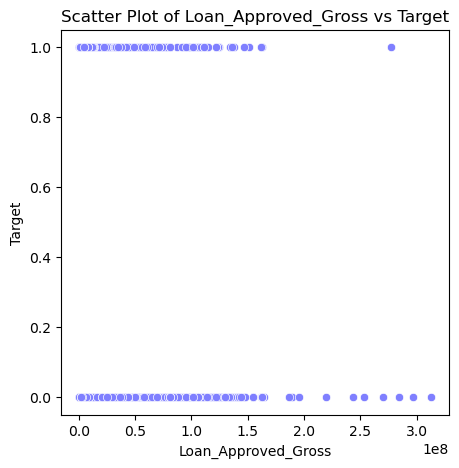

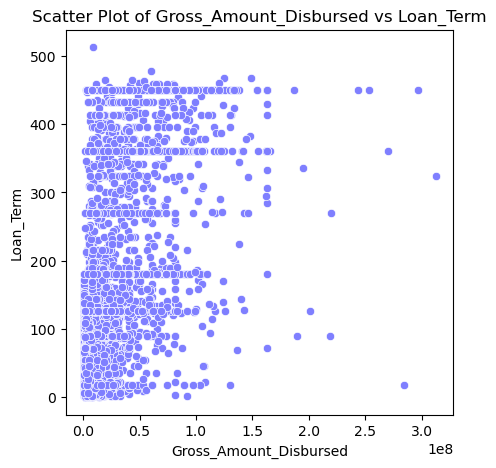

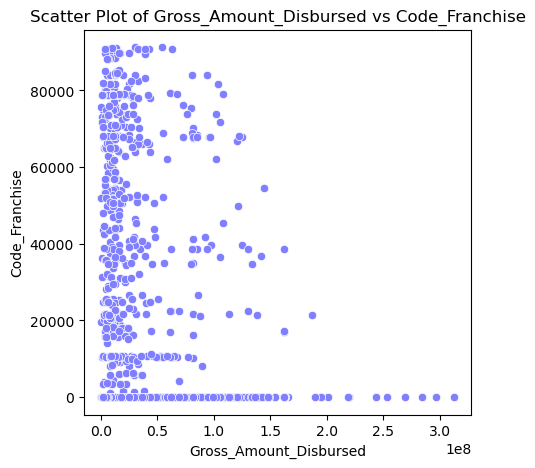

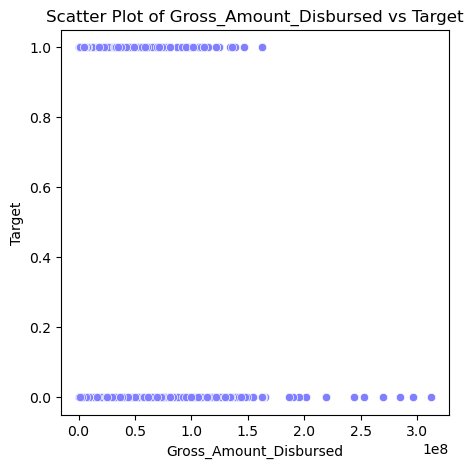

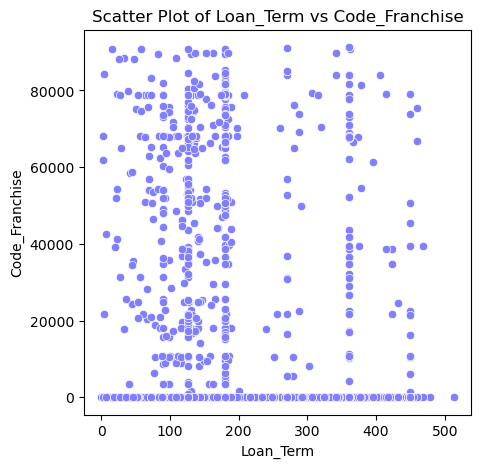

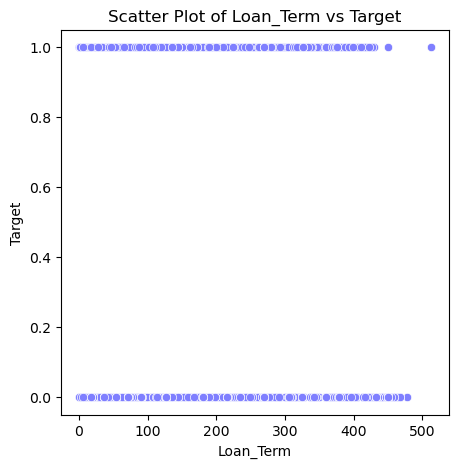

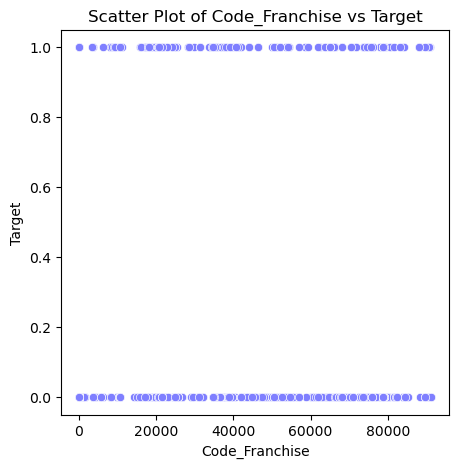

In [35]:
for i in range(len(num_cols.columns)):
    for j in range(i + 1, len(num_cols.columns)):
        plt.figure(figsize=(5, 5))
        sns.scatterplot(x=num_cols.iloc[:, i], y=num_cols.iloc[:, j], color='#7f7fff')
        plt.title(f'Scatter Plot of {num_cols.columns[i]} vs {num_cols.columns[j]}')
        plt.xlabel(num_cols.columns[i])
        plt.ylabel(num_cols.columns[j])
        plt.show()

In [36]:
num_cols.columns

Index(['Year_Of_Commitment', 'Guaranteed_Approved _Loan', 'ChargedOff_Amount',
       'Count_Employees', 'Classification_Code', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed', 'Loan_Term', 'Code_Franchise', 'Target'],
      dtype='object')

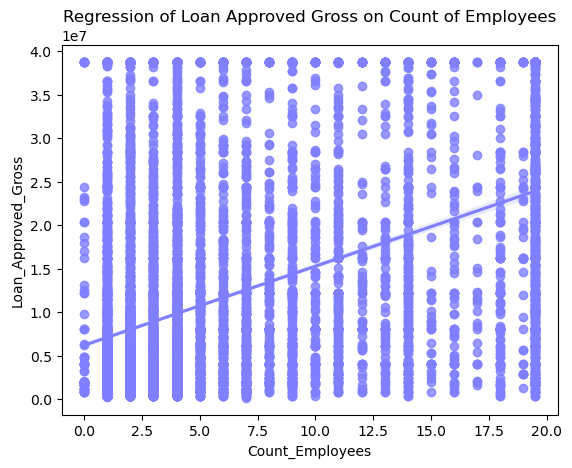

In [37]:
sns.regplot(x='Count_Employees', y='Loan_Approved_Gross', data=df, color='#7f7fff')
plt.title("Regression of Loan Approved Gross on Count of Employees")
plt.xlabel('Count_Employees')
plt.ylabel('Loan_Approved_Gross')
plt.show()

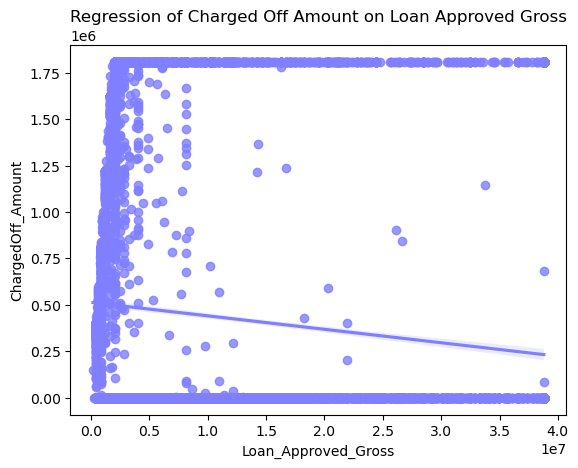

In [38]:
sns.regplot(x='Loan_Approved_Gross', y='ChargedOff_Amount', data=df, color='#7f7fff')
plt.title("Regression of Charged Off Amount on Loan Approved Gross")
plt.xlabel('Loan_Approved_Gross')
plt.ylabel('ChargedOff_Amount')
plt.show()

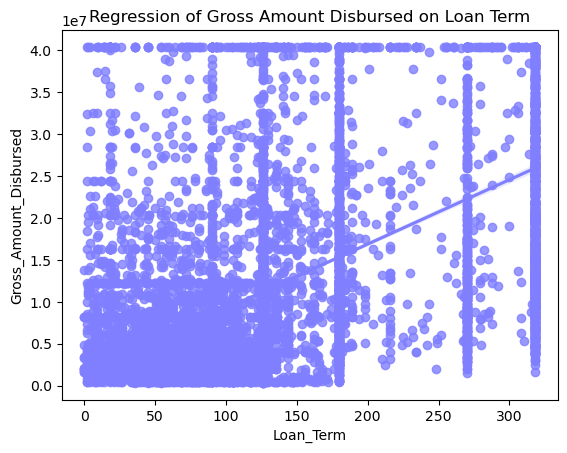

In [39]:
sns.regplot(x='Loan_Term', y='Gross_Amount_Disbursed', data=df, color='#7f7fff')
plt.title("Regression of Gross Amount Disbursed on Loan Term")
plt.xlabel('Loan_Term')
plt.ylabel('Gross_Amount_Disbursed')
plt.show()

## Heat Map

In [40]:
df_num = num_cols

In [41]:
corr_num = df_num.corr()
corr_num

,Year_Of_Commitment,Guaranteed_Approved _Loan,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Target
Year_Of_Commitment,1.000000,-0.123099,0.061188,-0.088988,0.507800,-0.106592,-0.076772,-0.310108,-0.030476,0.239510
Guaranteed_Approved _Loan,-0.123099,1.000000,0.221109,0.118196,-0.060084,0.974343,0.932857,0.534438,0.081520,-0.155694
ChargedOff_Amount,0.061188,0.221109,1.000000,0.002544,0.038250,0.255760,0.252569,-0.044165,0.042709,0.435407
Count_Employees,-0.088988,0.118196,0.002544,1.000000,-0.064456,0.117219,0.114460,0.074371,0.007223,-0.045708
Classification_Code,0.507800,-0.060084,0.038250,-0.064456,1.000000,-0.054598,-0.046502,-0.125191,0.027754,0.124905
Loan_Approved_Gross,-0.106592,0.974343,0.255760,0.117219,-0.054598,1.000000,0.967184,0.518564,0.078932,-0.143075
Gross_Amount_Disbursed,-0.076772,0.932857,0.252569,0.114460,-0.046502,0.967184,1.000000,0.492742,0.069906,-0.137623
Loan_Term,-0.310108,0.534438,-0.044165,0.074371,-0.125191,0.518564,0.492742,1.000000,0.039062,-0.382355
Code_Franchise,-0.030476,0.081520,0.042709,0.007223,0.027754,0.078932,0.069906,0.039062,1.000000,-0.021251
Target,0.239510,-0.155694,0.435407,-0.045708,0.124905,-0.143075,-0.137623,-0.382355,-0.021251,1.000000


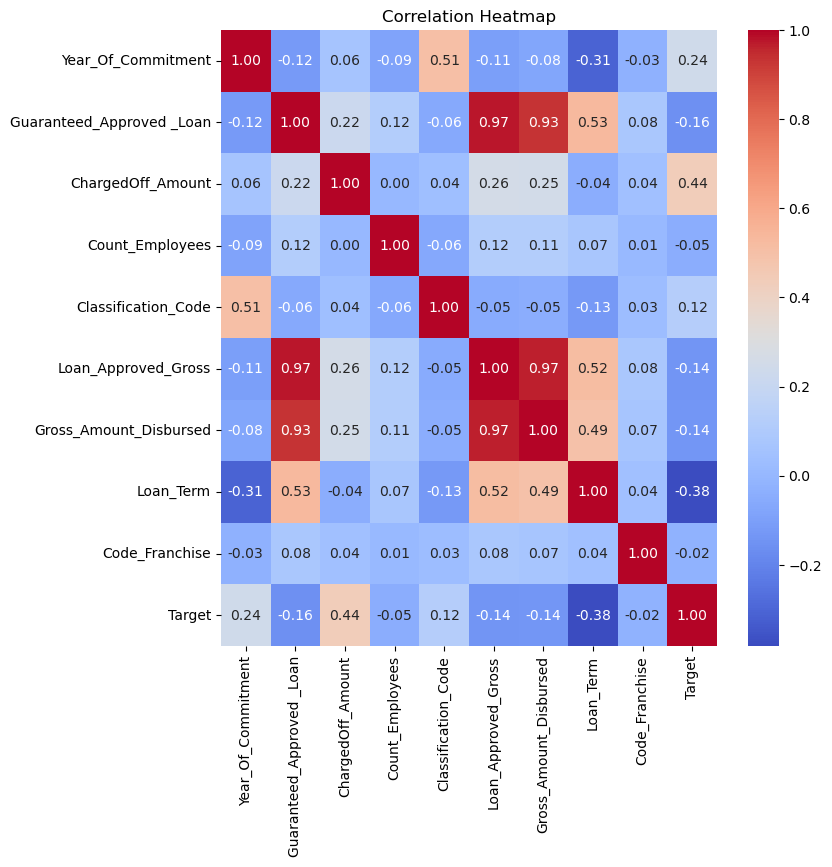

In [42]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
num_cols.drop('Loan_Approved_Gross', axis=1, inplace=True)
num_cols.drop('Guaranteed_Approved _Loan', axis=1, inplace=True)

## Visualization Done !

## DESCRIPTIVE ANALYSIS

In [44]:
df_num.median()

Year_Of_Commitment           2003.00
ChargedOff_Amount               0.00
Count_Employees                 4.00
Classification_Code        447110.00
Gross_Amount_Disbursed    7940934.08
Loan_Term                     126.00
Code_Franchise                  1.00
Target                          0.00
dtype: float64

In [45]:
df2= df_num.mode()
df2

,Year_Of_Commitment,ChargedOff_Amount,Count_Employees,Classification_Code,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Target
0,2007,0.0,1,0,4064000.0,126,1,0


In [46]:
df_num.std()

Year_Of_Commitment        5.960235e+00
ChargedOff_Amount         6.249601e+06
Count_Employees           4.852982e+01
Classification_Code       2.599774e+05
Gross_Amount_Disbursed    2.256782e+07
Loan_Term                 1.156138e+02
Code_Franchise            1.289304e+04
Target                    4.515118e-01
dtype: float64

In [47]:
df_num.var()

Year_Of_Commitment        3.552440e+01
ChargedOff_Amount         3.905751e+13
Count_Employees           2.355143e+03
Classification_Code       6.758825e+10
Gross_Amount_Disbursed    5.093064e+14
Loan_Term                 1.336655e+04
Code_Franchise            1.662306e+08
Target                    2.038629e-01
dtype: float64

In [48]:
df_num.skew()

Year_Of_Commitment        -0.784389
ChargedOff_Amount          8.013592
Count_Employees           49.838222
Classification_Code       -0.309132
Gross_Amount_Disbursed     3.710173
Loan_Term                  1.204656
Code_Franchise             4.996003
Target                     0.951851
dtype: float64

In [49]:
Q1=df_num.quantile(0.25)
Q1

Year_Of_Commitment           1997.0
ChargedOff_Amount               0.0
Count_Employees                 2.0
Classification_Code        236115.0
Gross_Amount_Disbursed    3251200.0
Loan_Term                      88.0
Code_Franchise                  0.0
Target                          0.0
Name: 0.25, dtype: float64

In [50]:
Q2=df_num.quantile(0.50)
Q2

Year_Of_Commitment           2003.00
ChargedOff_Amount               0.00
Count_Employees                 4.00
Classification_Code        447110.00
Gross_Amount_Disbursed    7940934.08
Loan_Term                     126.00
Code_Franchise                  1.00
Target                          0.00
Name: 0.5, dtype: float64

In [51]:
Q3=df_num.quantile(0.75)
Q3

Year_Of_Commitment            2006.00
ChargedOff_Amount           723452.96
Count_Employees                  9.00
Classification_Code         561940.00
Gross_Amount_Disbursed    18109102.72
Loan_Term                      180.00
Code_Franchise                   1.00
Target                           1.00
Name: 0.75, dtype: float64

In [52]:
IQR=Q3-Q1
IQR

Year_Of_Commitment               9.00
ChargedOff_Amount           723452.96
Count_Employees                  7.00
Classification_Code         325825.00
Gross_Amount_Disbursed    14857902.72
Loan_Term                       92.00
Code_Franchise                   1.00
Target                           1.00
dtype: float64

In [53]:
df_num.cov()

,Year_Of_Commitment,ChargedOff_Amount,Count_Employees,Classification_Code,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Target
Year_Of_Commitment,3.552440e+01,2.279191e+06,-2.573979e+01,7.868490e+05,-1.032661e+07,-2.136911e+02,-2.341947e+03,6.445496e-01
ChargedOff_Amount,2.279191e+06,3.905751e+13,7.717135e+05,6.214762e+10,3.562226e+13,-3.191105e+07,3.441309e+09,1.228618e+06
Count_Employees,-2.573979e+01,7.717135e+05,2.355143e+03,-8.132179e+05,1.253579e+08,4.172741e+02,4.519436e+03,-1.001536e+00
Classification_Code,7.868490e+05,6.214762e+10,-8.132179e+05,6.758825e+10,-2.728316e+11,-3.762859e+06,9.302940e+07,1.466165e+04
Gross_Amount_Disbursed,-1.032661e+07,3.562226e+13,1.253579e+08,-2.728316e+11,5.093064e+14,1.285638e+09,2.034052e+10,-1.402330e+06
Loan_Term,-2.136911e+02,-3.191105e+07,4.172741e+02,-3.762859e+06,1.285638e+09,1.336655e+04,5.822653e+04,-1.995934e+01
Code_Franchise,-2.341947e+03,3.441309e+09,4.519436e+03,9.302940e+07,2.034052e+10,5.822653e+04,1.662306e+08,-1.237113e+02
Target,6.445496e-01,1.228618e+06,-1.001536e+00,1.466165e+04,-1.402330e+06,-1.995934e+01,-1.237113e+02,2.038629e-01


# Encoding!

In [54]:
!pip install category_encoders


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import category_encoders as ce

In [56]:
cat_cols = obj_cols.columns
encoder = ce.BinaryEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df)
df_encoded

,Business_0,Business_1,Year_Of_Commitment,Guaranteed_Approved _Loan,Low_Documentation_Loan_0,Low_Documentation_Loan_1,Low_Documentation_Loan_2,Demography_0,Demography_1,ChargedOff_Amount,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Revolving_Credit_Line_0,Revolving_Credit_Line_1,Target
0,0,1,1991.0,30632400.0,0,0,1,0,1,0.0,19.5,0.0,38801040.0,40395956.80,126.0,1.0,0,1,0.0
1,1,0,2006.0,30632400.0,0,0,1,1,0,1808632.4,6.0,451120.0,38801040.0,40395956.80,123.0,1.0,0,1,1.0
2,0,1,2004.0,1422400.0,0,0,1,1,0,0.0,4.0,541618.0,2844800.0,5961400.32,90.0,1.0,1,0,0.0
3,1,0,2006.0,2032000.0,0,0,1,1,0,0.0,7.0,811112.0,4064000.0,4064000.00,126.0,0.0,1,0,0.0
4,0,1,2005.0,22981920.0,0,0,1,1,0,1808632.4,4.0,722211.0,30642560.0,30642560.00,104.0,1.0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,1,2005.0,1422400.0,0,0,1,1,0,0.0,5.0,562111.0,2844800.0,2844800.00,36.0,1.0,1,0,0.0
9995,0,1,1986.0,4291584.0,0,0,1,0,1,1808632.4,2.0,0.0,4876800.0,4876800.00,46.0,0.0,0,1,1.0
9996,0,1,2007.0,447040.0,0,0,1,1,0,894080.0,3.0,488999.0,894080.0,1494739.20,88.0,0.0,0,1,1.0
9997,1,0,2000.0,2357120.0,0,0,1,1,1,1808632.4,1.0,0.0,4714240.0,4714240.00,6.0,1.0,0,1,1.0


## SCALING

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_scaler=scaler.fit_transform(num_cols)
std_scaler

array([[-1.75934703, -0.27609268,  0.58833189, ..., -0.25917746,
        -0.21483554, -0.63159214],
       [ 0.75745818,  5.8499437 , -0.07108955, ..., -0.28512721,
        -0.21483554,  1.58330026],
       [ 0.42188415, -0.27609268, -0.11230338, ..., -0.57057454,
        -0.21483554, -0.63159214],
       ...,
       [ 0.92524519, -0.13302359, -0.1329103 , ..., -0.58787438,
        -0.2149131 ,  1.58330026],
       [-0.2492639 ,  0.24449672, -0.17412414, ..., -1.29716773,
        -0.21483554,  1.58330026],
       [ 0.92524519, -0.27609268, -0.15351722, ..., -0.25917746,
        -0.2149131 , -0.63159214]])

In [58]:
std_scaler.shape

(9998, 8)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif=pd.DataFrame()

In [61]:
vif['vif']=[variance_inflation_factor(std_scaler,i) for i in range(std_scaler.shape[1])]
vif['Features']=num_cols.columns
vif

,vif,Features
0,1.510852,Year_Of_Commitment
1,1.412721,ChargedOff_Amount
2,1.020955,Count_Employees
3,1.355834,Classification_Code
4,1.512565,Gross_Amount_Disbursed
5,1.635034,Loan_Term
6,1.009492,Code_Franchise
7,1.517427,Target


## TRAIN TEST SPLIT

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
num_cols

,Year_Of_Commitment,ChargedOff_Amount,Count_Employees,Classification_Code,Gross_Amount_Disbursed,Loan_Term,Code_Franchise,Target
0,1991,0.00,38,0,40640000.00,126,1,0
1,2006,38283367.68,6,451120,43647360.00,123,1,1
2,2004,0.00,4,541618,5961400.32,90,1,0
3,2006,0.00,7,811112,4064000.00,126,0,0
4,2005,22862519.68,4,722211,30642560.00,104,1,1
...,...,...,...,...,...,...,...,...
9994,2005,0.00,5,562111,2844800.00,36,1,0
9995,1986,2894624.64,2,0,4876800.00,46,0,1
9996,2007,894080.00,3,488999,1494739.20,88,0,1
9997,2000,3253313.28,1,0,4714240.00,6,1,1


In [64]:
x = num_cols.drop(['Target', 'Code_Franchise'],axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23) 

In [65]:
print(x.shape,x_train.shape,x_test.shape)

(9998, 6) (7998, 6) (2000, 6)


## MODEL BUILDING Using LogisiticRegression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [67]:
x = num_cols.drop(['Target', 'Code_Franchise'],axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23) 

In [68]:
model = LogisticRegression()
model.fit(x_train,y_train)

lr_prediction = model.predict(x_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.986


In [69]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [0. 0. 1. ... 1. 0. 1.]
y_test 6326    0.0
5185    0.0
2495    1.0
2765    1.0
9302    0.0
       ... 
1848    0.0
387     0.0
9967    1.0
9375    0.0
2613    1.0
Name: Target, Length: 3000, dtype: float64


## MODEL BUILDING Using KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# y_pred

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

## MODEL BUILDING Using DecisionTreeClassifier

## Model Training

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier as DTC, export_text
# from sklearn import tree

In [ ]:
# dec_tree_gini = DTC(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
# dec_tree_entropy = DTC(criterion='entropy', max_depth=6, class_weight='balanced', random_state=42)

In [ ]:
# dec_tree_gini.fit(x_train, y_train)

In [ ]:
# dec_tree_entropy.fit(x_train, y_train)

In [ ]:
# gini_y_pred = dec_tree_gini.predict(x_test)

In [ ]:
# entropy_y_pred = dec_tree_entropy.predict(x_test)

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# gini_accuracy = accuracy_score(y_test, gini_y_pred)
# print(f"Gini model accuracy: {gini_accuracy * 100:.2f}%")
# print()
# gini_conf_matrix = confusion_matrix(y_test, gini_y_pred)
# print('Gini Confusion Matrix:')
# print(gini_conf_matrix)
# print ( )
# entropy_accuracy =  accuracy_score(y_test, entropy_y_pred)
# print(f"model Accuracy: {entropy_accuracy*100:.2f}%" )
# print ( )
# entropy_conf_matrix = confusion_matrix(y_test, entropy_y_pred)
# print('Gini Confusion Matrix:')
# print(gini_conf_matrix)
# print ( )

## MODEL BUILDING Using LinearRegression (Worst Accuracy)

In [ ]:
# regressor=LinearRegression()
# regressor.fit(x_train ,y_train)

In [ ]:
# # Model evaluation
# # prediction on training data

# training_data_prediction=regressor.predict(x_train) 

In [ ]:
# # R squared value for training data ( lie in the range of 0 to 1  ) # if value is close to 0 (performance is well)
# r2_train = metrics.r2_score(y_train , training_data_prediction)
# print("R squared value on training data:",r2_train) 

In [ ]:
# # prediction on testing data
# test_data_prediction=regressor.predict(x_test)  

In [ ]:
# # R squared value for testing data ( lie in the range of 0 to 1  ) # if value is close to 0 (performance is well)
# from sklearn import metrics

# # Assuming Y_test and test_data_prediction are already defined
# r2_test = metrics.r2_score(y_test, test_data_prediction)

# # Print the absolute value of R squared
# print("R squared value (absolute):", abs(r2_test))

In [ ]:
# x

In [ ]:
# y

In [ ]:
# # building a predictive system
# input_data=(80 ,0 ,24.3 ,1 ,0 ,72) 

# # changing input_data to a numpy array
# input_data_as_numpy_array=np.asarray(input_data)

# # reshape the array
# input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# prediction=regressor.predict(input_data_reshaped)
# print(input_data_reshaped)
# print(prediction)

In [ ]:
# principle_x = df.drop(columns=['Target'])  # Define features by dropping the target column

# # Split the dataset into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(principle_x, y, random_state=42, test_size=0.3)

# # Print the sizes of the training and testing sets
# print('Training feature matrix size:', x_train.shape)
# print('Training target vector size:', y_train.shape)
# print('Test feature matrix size:', x_test.shape)
# print('Test target vector size:', y_test.shape)